source: https://huggingface.co/mattmdjaga/segformer_b2_clothes

In [4]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [6]:
from transformers import AutoFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

extractor = AutoFeatureExtractor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = SegformerForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

ModuleNotFoundError: No module named 'torch'

In [18]:
from google.colab import drive

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

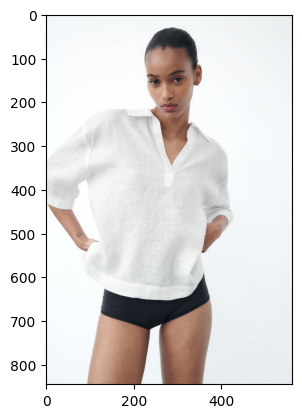

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

# Path to the image file on Google Drive
image_path = "/content/drive/MyDrive/images_zara/page_1_idx_0_name_BLUSA LINO.jpg"

image = Image.open(image_path)

# Plot and display the image using Matplotlib
plt.imshow(image)
plt.show()


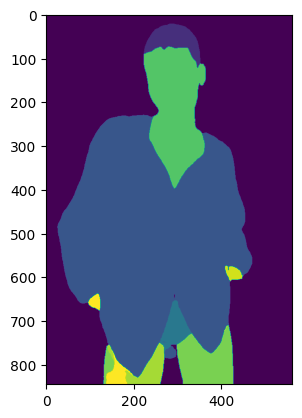

In [6]:
image = Image.open('/content/drive/MyDrive/images_zara/page_1_idx_1_name_CAMISA OVERSIZE RAYAS.jpg')
inputs = extractor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
plt.imshow(pred_seg)


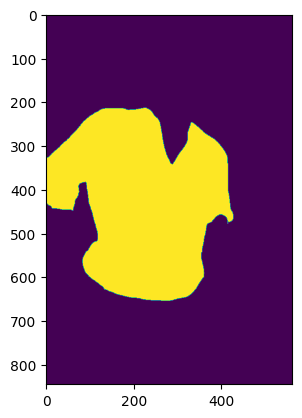

In [ ]:
from transformers import AutoFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

extractor = AutoFeatureExtractor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = SegformerForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

input_folder_path = '"/content/drive/MyDrive/images_zara'
output_folder_path = '"/content/drive/MyDrive/images_zara_mask'

# image_path = "/content/drive/MyDrive/images_zara/page_1_idx_0_name_BLUSA LINO.jpg"

image = Image.open(image_path)
inputs = extractor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]

# Extract the upper cloth mask
upper_cloth_label = 4  # Replace with the actual label index for the upper cloth
upper_cloth_mask = pred_seg == upper_cloth_label

# Plot and display the upper cloth mask
plt.imshow(upper_cloth_mask)
plt.show()


In [7]:
from transformers import AutoFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
import os
import numpy as np
import torchvision.utils as vutils


extractor = AutoFeatureExtractor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = SegformerForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

input_folder_path = '/content/drive/MyDrive/images_zara/'
output_folder_path = '/content/drive/MyDrive/images_zara_mask/'

if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Iterate over the images in the input folder
for filename in os.listdir(input_folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Update with supported image extensions
        # Read the image
        image_path = os.path.join(input_folder_path, filename)
        image = Image.open(image_path)

        inputs = extractor(images=image, return_tensors="pt")
        outputs = model(**inputs)
        logits = outputs.logits.cpu()

        upsampled_logits = nn.functional.interpolate(
            logits,
            size=image.size[::-1],
            mode="bilinear",
            align_corners=False,
        )

        pred_seg = upsampled_logits.argmax(dim=1)[0]

        # Extract the upper cloth mask
        upper_cloth_label = 4  # Replace with the actual label index for the upper cloth
        upper_cloth_mask = pred_seg == upper_cloth_label

        # Convert the tensor to a NumPy array
        img_upper_cloth_mask = upper_cloth_mask.numpy().astype(np.uint8) * 255

        # Convert the NumPy array to a PIL Image
        image_pil = Image.fromarray(img_upper_cloth_mask)

        # Specify the output image file path with the .jpg extension
        output_image_path = os.path.join(output_folder_path, filename)
        output_image_path = output_image_path.replace('.png', '.jpg')

        # Save the image as JPEG
        image_pil.save(output_image_path)


In [ ]:
import cv2
import os
import numpy as np

image_folder = '/content/drive/MyDrive/images_zara'
mask_folder = '/content/drive/MyDrive/images_zara_mask'
output_folder_path = '/content/drive/MyDrive/images_zara_final/'

if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

image_files = os.listdir(image_folder)

for image_file in image_files:
    # Load the image and mask
    image_path = os.path.join(image_folder, image_file)
    mask_path = os.path.join(mask_folder, image_file)  # Assuming mask filenames are the same as image filenames
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Apply the mask as a binary filter
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    output_image_path = os.path.join(output_folder_path, image_file)
    output_image_path = output_image_path.replace('.png', '.jpg')

    if masked_image is None:
      print("Error: Failed to load the image.")
      continue

    # Save the masked image
    cv2.imwrite(output_image_path, masked_image)



Error: Failed to load the image.
